# 618 Project - Cosmetics Product Analysis Part 1

**Title:**

Uncovering Market Trends and Key Drivers of Customer Satisfaction: A Data Analysis of Sephora Products and Reviews

**Team Members**: 
- Ruizhe Wang (Unique Name: wrzwrz)
- Zhiyi Ji (Unique Name: jizhiyi)

## Overview

This project focuses on analyzing the **Sephora Products and Skincare Reviews Dataset**, which contains detailed information on over 8,000 beauty products and 1 million customer reviews. The dataset provides key insights into the cosmetic industry through product attributes, prices, ingredients, and customer feedback. 

Our primary objective is to identify **factors that drive higher product ratings** and understand how ingredients, prices, and product types influence customer satisfaction. Additionally, we aim to explore why certain products underperform by analyzing user reviews. Beyond ratings, we will investigate **trends in consumer sentiment** over time and assess the impact of movements like "clean beauty" and seasonal variations in feedback. 

Using **data manipulation, sentiment analysis, and visualization**, we intend to uncover patterns in customer behavior, empowering brands to align their strategies with customer needs and industry trends.

## Motivation

The cosmetic and skincare industry is evolving rapidly, with consumers becoming more focused on **tailored solutions and sustainable products**. Customer reviews are now essential in shaping brand reputations and guiding purchase decisions. This project is motivated by a desire to understand **what drives customer satisfaction**, allowing businesses to improve product offerings based on consumer needs. 

Specifically, we aim to address the following **3 real-world questions**:
1. **What factors drive higher product ratings?** Why do certain products underperform?  
   - What we hope to learn: Identify which product attributes (e.g., ingredients, price) are linked to higher satisfaction and uncover common issues affecting low-rated products. We also want to generate methods to resolve the issues. 

2. **How does customer sentiment change over time?**  
   - What we hope to learn: Analyze shifts in customer feedback and assess the impact of trends (e.g. "clean beauty") to better understand evolving preferences.  

3. **Are certain ingredients linked to positive or negative customer experiences?**  
   - What we hope to learn: Detect patterns in ingredient preferences and identify sources of customer dissatisfaction.  

Through this analysis, we hope to generate **actionable insights** that help brands meet customer expectations, avoid problematic ingredients, and **enhance customer experiences**. 

## Data Sources

Our project utilizes two primary datasets, which complement each other by linking **product attributes** with **customer feedback**, providing the comprehensive information for our analysis.  

This data was collected in March 2023 and provides detailed information on a variety of beauty and skincare products available on Sephora's online store. It includes both product details and customer reviews, offering a comprehensive view of customer feedback and product features. The dataset is publicly available on Kaggle, a popular data platform, making it suitable for exploratory analysis and machine learning tasks.

**URL:**
- [Kaggle: Sephora Products and Skincare Reviews Dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)

**Description:**

1. **Product Information Dataset** (`product_info.csv`)  
   - Contains detailed data on **8,000+ products** from various brands, covering the following attributes:
     - **Product name** and **brand**  
     - **Price**  
     - **Ingredients** and **product type** (e.g., moisturizer, serum)  
     - Product features (e.g., organic, vegan, chemical-free)  
   - **Purpose**: This dataset allows us to analyze product pricing, ingredients, average ratings and categorize product types.  

2. **Customer Reviews Dataset**  
   - Split across multiple files: `review_0-250.csv`, `review_250-500.csv`, `review_500-750.csv`, `review_750-1250.csv`, `review_1250-end.csv`.  
   - Contains **1 million+ reviews** on over **2,000 skincare products**, with key data fields:
     - **Ratings**: Numerical scores reflecting customer satisfaction  
     - **Review text**: Customer opinions, experiences, and feedback  
     - **Review metadata**: User details (e.g., skin type) and peer ratings on the helpfulness of reviews  
     - **Date**: Submitting date of the reviews. 
   - **Purpose**: This dataset helps us explore customer feedbacks and sentiment and detect market trends.

#### How the Datasets Complement Each Other

The **product information dataset** provides insight into product attributes such as ingredients, pricing and etc., while the **customer reviews dataset** offers feedback on how these products perform from the customer’s perspective. Together, these datasets offer a comprehensive view of the relationship between product attributes and consumer experiences, enabling us to uncover actionable insights for brands in the cosmetic industry. 

It is worth noting that the customer reviews dataset covers reviews on **only 2,000 skincare products**, while the product information dataset includes details on **8,000+ products** across various categories.

## Data Description


In [40]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### Product Information

Firstly, we load the data from existing `csv` file and get an idea of its shape as well as fields included.

In [41]:
product_df = pd.read_csv("Sephora/product_info.csv")

In [42]:
print("product info dataframe shape: ", product_df.shape)
product_df.head()

product info dataframe shape:  (8494, 27)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


To get an idea of the general information of the dataset both intuitively and statistically, we use `.info()` and `.describe()` correspondingly to have basic information result, and the outcome is displayed as follows.

In [43]:
print("Basic Information:")
product_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   

In [44]:
print("\nSummary Statistics (Numerical):")
product_df.describe()


Summary Statistics (Numerical):


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


### Customer Review

We load data of customer review into dataframes and concat them together into one complete dataframe altogether. after that, we apply similar analysis methods to have an intuitive overview. The results are displayed as follows.

In [45]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
review_df_1 = pd.read_csv("Sephora/reviews_0-250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_2 = pd.read_csv("Sephora/reviews_250-500.csv",index_col = 0, dtype={'author_id':'str'})
review_df_3 = pd.read_csv("Sephora/reviews_500-750.csv",index_col = 0, dtype={'author_id':'str'})
review_df_4 = pd.read_csv("Sephora/reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_5 = pd.read_csv("Sephora/reviews_1250-end.csv",index_col = 0, dtype={'author_id':'str'})

# Merge review_df_1 till review_df_6
review_df = pd.concat([review_df_1, review_df_2, review_df_3, review_df_4, review_df_5],axis=0)
print("review_df shape: ",review_df.shape)

review_df shape:  (1094411, 18)


In [46]:
review_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
454003,7446724635,5,1.0,NaN,0,0,0,2019-05-26,This stuff is the best. I use it in the mornin...,a life saver!,light,blue,oily,blonde,P12045,Grape Water Moisturizing Face Mist,Caudalie,12.0
396925,1253183238,3,NaN,NaN,0,0,0,2014-01-25,I won’t be long. I really wanted to try this p...,"not bad, but not the best",NaN,NaN,NaN,NaN,P283501,Argan Cleansing Oil,Josie Maran,36.0
65016,35026227295,5,1.0,NaN,0,0,0,2022-01-22,I love this serum! It leaves your skin feeling...,NaN,fair,blue,dry,brown,P479362,Triple Peptide Hydrating + Firming Oasis Serum...,Youth To The People,54.0
266100,20083461461,4,1.0,NaN,0,0,0,2021-05-31,I will start off by saying I thought this prod...,Pretty good product,fair,green,dry,blonde,P426183,Mini Facial Treatment Essence (Pitera Essence),SK-II,99.0
135146,6026474778,5,1.0,1.0,5,0,5,2021-04-15,I’ll be honest I never really worried about SP...,10/10,light,brown,oily,brown,P467249,Hydra Vizor Invisible Moisturizer Broad Spectr...,Fenty Skin,39.0


In [47]:
print("Basic Information:")
review_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color     

In [48]:
print("\nSummary Statistics (Numerical):")
review_df.describe()


Summary Statistics (Numerical):


,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


Note: The missing value part will be introduced in section `Data Cleaning`. 

## Data Manipulation & Visualization

After the first step of importing, merging and describing data, we go a step further into data manipulation, to process on the data and turn it into a more tidy and easy-to-use format. Alongside, we conduct data visualization to provide us a straightforward display of all kinds of data distribution, so as to give us a clearer sense of the data. Aspects include customers' rating, item price, size, etc.

#### Rating

To see the overall reputation condition of products, we visualized the distribution of customers' rating on all products. Shown below we can see that large percentage of customers give a rating between 4.5-5.0/5.0, indicating that they're satisfied with the products.

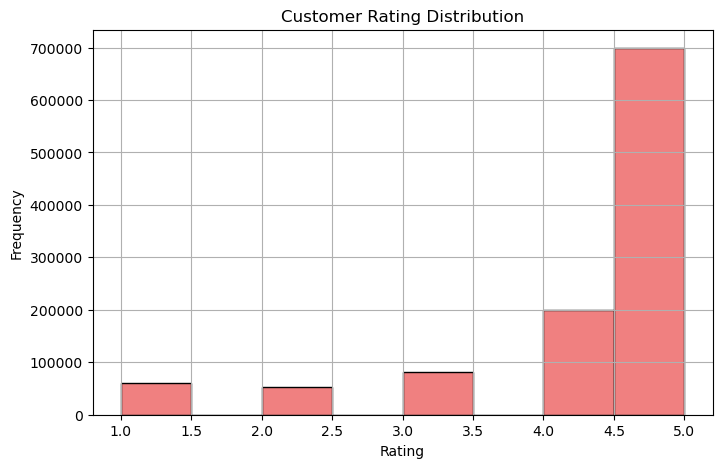

In [49]:
# Customer Rating Distribution
plt.figure(figsize=(8, 5))
review_df['rating'].hist(bins=8, color='lightcoral', edgecolor='black')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Price

To see the price distribution of all products, we create the visualization below. To avoid outliers, we will only visualize products with price <= 350 USD.

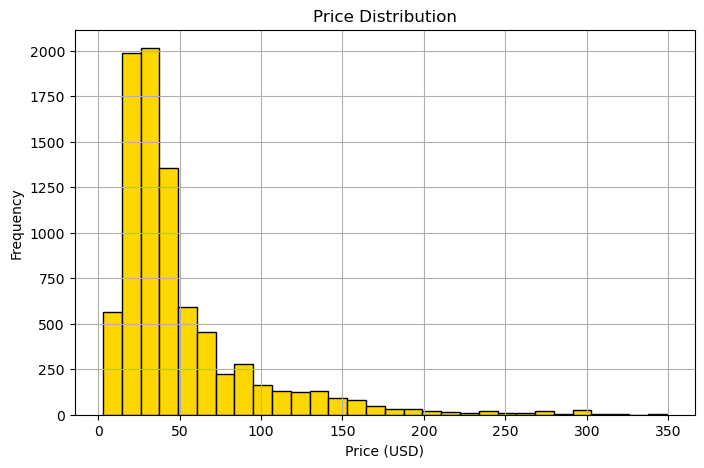

In [50]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_usd'] <= 350]['price_usd'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### Size
To see the size of the products, we extract numerical values from certain columns and conduct some datatype conversion to get get the size in both `oz` and `ml`.

In [51]:
product_df['size']

0                   NaN
1        3.4 oz/ 100 mL
2        3.4 oz/ 100 mL
3        3.4 oz/ 100 mL
4        3.4 oz/ 100 mL
             ...       
8489                NaN
8490       2 oz / 60 mL
8491                NaN
8492                NaN
8493    .11 oz / 3.2 mL
Name: size, Length: 8494, dtype: object

In [52]:
product_df['size_oz'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*oz', expand=False).astype(float)
print(product_df[['size', 'size_oz']].sample(10))

                      size  size_oz
163         5.7 oz/ 169 mL      5.7
1859           1 oz/ 30 mL      1.0
2630       3.3 oz / 100 mL      3.3
485                    NaN      NaN
4011        6.8 oz/ 200 mL      6.8
3766   7 oz / 200 g Candle      7.0
5473        8.1 oz / 230 g      8.1
8026  0.55 ml/ 0.018 fl oz      NaN
3789                  2 oz      2.0
2282                   NaN      NaN


In [53]:
product_df['size_ml'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*mL', expand=False)
product_df['size_ml'] = product_df['size_ml'].astype(float)
print(product_df[['size', 'size_ml']].sample(10))

                 size  size_ml
6687              NaN      NaN
3168      1 oz/ 30 mL     30.0
8003          0.04 oz      NaN
1147              NaN      NaN
6646        14  masks      NaN
2770    1.6 oz/ 50 mL     50.0
3360  0.87 oz / 26 ml      NaN
477       1 oz/ 30 mL     30.0
4467     .7 oz / 20 g      NaN
3499  0.05 oz / 15 ml      NaN


### Price Per Unit

To get an idea of the price distribution of products, we conduct some calculation and visualization to see the distribution. The results are show below.

In [54]:
product_df['price_per_oz'] = product_df['price_usd'] / product_df['size_oz']
product_df['price_per_ml'] = product_df['price_usd'] / product_df['size_ml']
product_df[['price_usd', 'size_oz', 'price_per_oz', 'size_ml', 'price_per_ml']].sample(10)

,price_usd,size_oz,price_per_oz,size_ml,price_per_ml
274,18.0,53.00,0.339623,NaN,NaN
2004,130.0,NaN,NaN,NaN,NaN
5549,69.0,3.30,20.909091,97.0,0.711340
3192,32.0,NaN,NaN,NaN,NaN
5804,28.0,NaN,NaN,145.0,0.193103
863,35.0,6.70,5.223881,200.0,0.175000
1210,38.0,3.30,11.515152,NaN,NaN
6541,14.0,NaN,NaN,NaN,NaN
4538,30.0,NaN,NaN,3.5,8.571429
5530,28.0,0.34,82.352941,10.0,2.800000


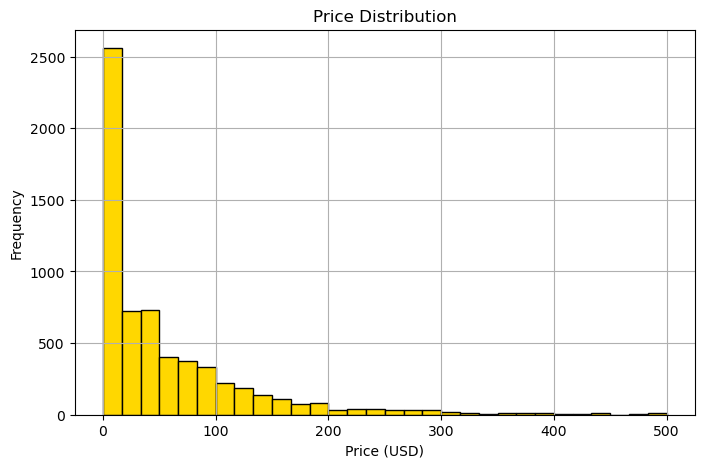

In [55]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_per_oz'] <= 500]['price_per_oz'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

### Category

To have an idea of how many items belong to each category, we conduct counting on both primary and secondary categories.

In [56]:
product_df['primary_category'].value_counts()

primary_category
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64

In [57]:
print(product_df['secondary_category'].shape)
product_df['secondary_category'].value_counts()

(8494,)


secondary_category
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
High Tech Tools               80
Wellness                      79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                    

### Loves Count

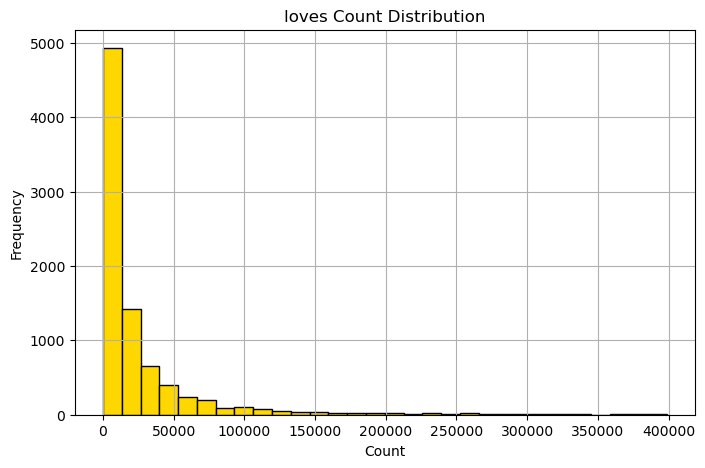

In [58]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['loves_count'] < 400000]['loves_count'].hist(bins=30, color='gold', edgecolor='black')
plt.title('loves Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

### Positive/Negative Feedback Percentage

Also we calculate and visualize on the positive and negative feedback percentages of customers, as another indication of their satisfactory level.

In [59]:
review_df['pos_feedback_percentage'] = review_df['total_pos_feedback_count']/review_df['total_feedback_count']
review_df['neg_feedback_percentage'] = review_df['total_neg_feedback_count']/review_df['total_feedback_count']
review_df[['total_pos_feedback_count', 'total_feedback_count', 'pos_feedback_percentage', 'total_neg_feedback_count', 'neg_feedback_percentage']].sample(5)

,total_pos_feedback_count,total_feedback_count,pos_feedback_percentage,total_neg_feedback_count,neg_feedback_percentage
266034,0,0,NaN,0,NaN
163008,0,0,NaN,0,NaN
123675,0,0,NaN,0,NaN
547581,0,0,NaN,0,NaN
45562,0,0,NaN,0,NaN


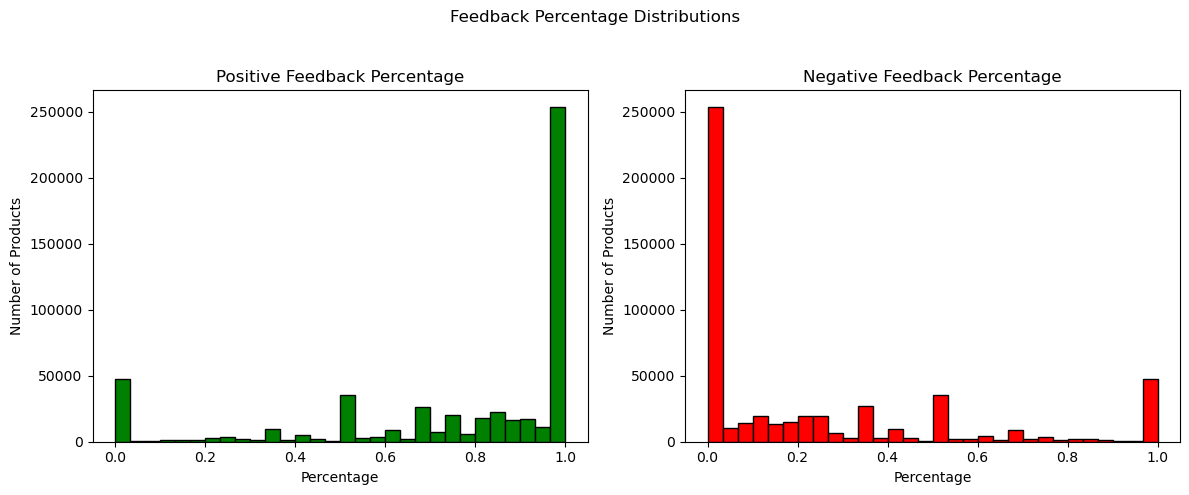

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Feedback Percentage Distributions')

axes[0].hist(review_df['pos_feedback_percentage'], bins=30, color='green', edgecolor='black')
axes[0].set_title('Positive Feedback Percentage')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Number of Products')

axes[1].hist(review_df['neg_feedback_percentage'], bins=30, color='red', edgecolor='black')
axes[1].set_title('Negative Feedback Percentage')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Number of Products')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ingredient
To see the ingredients contained in the products, we processed the strings in the `ingredients` column to extract certain fields, thus making some inferences with the help of visualization tools.

In [61]:
product_df['ingredients'] = product_df['ingredients'].str.strip("[]").str.replace("'", "").str.split(", ")
all_ingredients = product_df['ingredients'].explode().dropna().tolist()
ingredient_counts = Counter(all_ingredients)
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)

In [62]:
ingredient_df.head(5)

,Ingredient,Count
191,Glycerin,4171
212,Phenoxyethanol,3862
211,Caprylyl Glycol,2747
321,Tocopherol,2681
20,Limonene,2537


In [63]:
top20_ingredients = [ingredient for ingredient, _ in ingredient_counts.most_common(20)]

# Add column in product_df for each of the top 20 ingredients for further analysis
for ingredient in top20_ingredients:
    column_name = f'contains_{ingredient}'
    product_df[column_name] = product_df['ingredients'].apply(lambda x: ingredient in x if isinstance(x, list) else False)

In [64]:
columns_to_display = ['product_id'] + [f'contains_{ingredient}' for ingredient in top20_ingredients]
product_df[columns_to_display].head()

,product_id,contains_Glycerin,contains_Phenoxyethanol,contains_Caprylyl Glycol,contains_Tocopherol,contains_Limonene,contains_Ethylhexylglycerin,contains_Dimethicone,contains_Linalool,contains_Silica,...,contains_Citric Acid,contains_Mica,contains_Potassium Sorbate,contains_Water,contains_Caprylic/Capric Triglyceride,contains_Sodium Benzoate,contains_Citronellol,contains_Tocopheryl Acetate,contains_Propanediol,contains_Geraniol
0,P473671,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,P473668,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,P473662,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,P473660,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,P473658,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


<Figure size 1200x600 with 0 Axes>

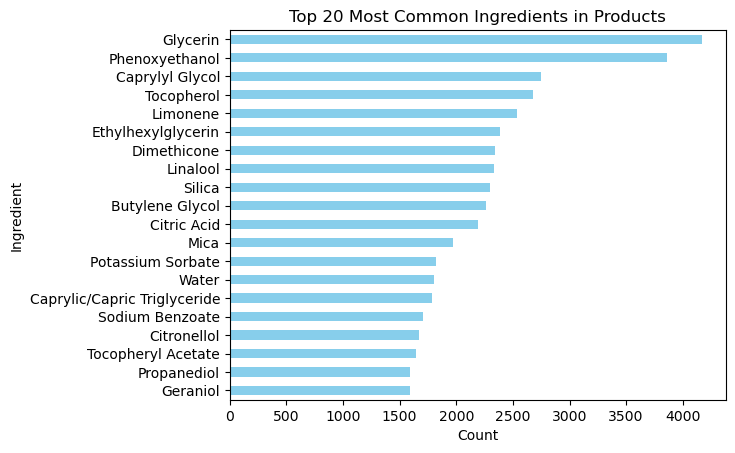

In [65]:
plt.figure(figsize=(12, 6))
ingredient_df.head(20).plot(kind='barh', x='Ingredient', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Most Common Ingredients in Products')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.gca().invert_yaxis()
plt.show()

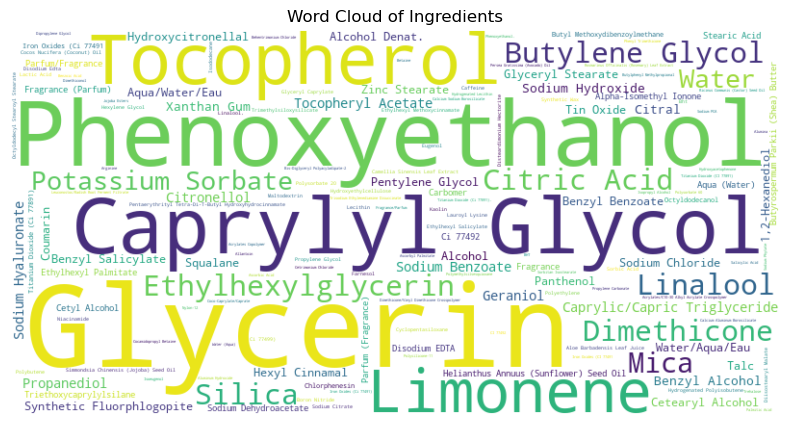

In [66]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()

### Merge Two Datasets

After all of the work and analysis above, we then merge the two datasets together for more convenient future work and analysis. The process is shown below. 

In [67]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
# Merge product_df and review_df
cols_to_use = product_df.columns.difference(review_df.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')

Sephora_df = pd.merge(review_df, product_df[cols_to_use], how='outer', on=['product_id', 'product_id'])
print("Sephora Shape: ", Sephora_df.shape)

Sephora Shape:  (1100554, 66)


In [68]:
Sephora_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,secondary_category,sephora_exclusive,size,size_ml,size_oz,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
869335,1918680146,5.0,1.0,NaN,0.0,0.0,0.0,2021-03-27,I received the color correcting treatment comp...,NaN,...,Mini Size,1,0.5 oz/ 15 mL,15.0,0.5,NaN,NaN,NaN,Size,0.5 oz/ 15 mL
348709,12130172586,4.0,1.0,NaN,0.0,0.0,0.0,2019-06-30,Good for weekly peeling. I would suggest a moi...,NaN,...,Masks,0,4.2 oz/ 125 mL,125.0,4.2,Face Masks,NaN,NaN,Size,4.2 oz/ 125 mL
783797,26148071188,5.0,1.0,NaN,0.0,0.0,0.0,2021-10-26,I love this serum my face before using this wa...,NaN,...,Treatments,0,1.0 oz/ 30 mL,30.0,1.0,Face Serums,NaN,NaN,Size,1.0 oz/ 30 mL
1023776,6025580339,5.0,1.0,NaN,0.0,0.0,0.0,2022-08-07,I use this product when I didn’t get enough sl...,Morning routine serum,...,Treatments,0,1 oz / 30 mL,30.0,1.0,Face Serums,NaN,NaN,Size,1 oz / 30 mL
484678,6394832911,5.0,NaN,1.0,2.0,0.0,2.0,2017-05-14,I use this with the oil and my dry skin is so ...,NaN,...,Moisturizers,0,1.7 oz/ 50 mL,50.0,1.7,Night Creams,NaN,NaN,Size,1.7 oz/ 50 mL


In [69]:
Sephora_df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,pos_feedback_percentage,neg_feedback_percentage,brand_id,...,online_only,out_of_stock,price_per_ml,price_per_oz,reviews,sale_price_usd,sephora_exclusive,size_ml,size_oz,value_price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,532819.000000,532819.000000,1.100554e+06,...,1.100554e+06,1.100554e+06,854407.000000,992297.000000,1.100276e+06,9978.000000,1.100554e+06,854407.000000,992297.000000,31189.000000
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01,0.767782,0.232218,5.547432e+03,...,1.106088e-01,3.182942e-02,1.345774,40.577942,2.151789e+03,16.888082,3.239396e-01,67.240317,3.073330,114.830038
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01,0.317164,0.317164,1.493821e+03,...,3.136473e-01,1.755458e-01,1.571010,141.789132,2.524573e+03,13.961803,4.679775e-01,55.643145,7.784536,62.313042
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000,1.063000e+03,...,0.000000e+00,0.000000e+00,0.020833,0.130682,1.000000e+00,1.750000,0.000000e+00,0.160000,0.000200,0.000000
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.652174,0.000000,5.626000e+03,...,0.000000e+00,0.000000e+00,0.333333,9.990000,5.390000e+02,7.000000,0.000000e+00,30.000000,1.000000,68.000000
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,0.928571,0.071429,6.073000e+03,...,0.000000e+00,0.000000e+00,0.950000,26.470588,1.337000e+03,18.000000,0.000000e+00,50.000000,1.700000,102.000000
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01,1.000000,0.347826,6.234000e+03,...,0.000000e+00,0.000000e+00,1.866667,50.000000,2.891000e+03,20.000000,1.000000e+00,95.000000,3.380000,142.000000
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03,1.000000,1.000000,8.020000e+03,...,1.000000e+00,1.000000e+00,131.250000,110000.000000,2.128100e+04,320.000000,1.000000e+00,1000.000000,176.000000,617.000000


### Data Cleaning

Finally, to deal with potential `NaN` values in the data of all kinds, we conduct data cleaning approaches shown as follows. 

In [70]:
# 1. Check for missing values
print("Missing values per column:")
print(Sephora_df.isnull().sum())

Missing values per column:
author_id                  6143
rating                     6143
is_recommended           174131
helpfulness              567735
total_feedback_count       6143
                         ...   
tertiary_category        161894
value_price_usd         1069365
variation_desc          1091034
variation_type            52560
variation_value           64644
Length: 66, dtype: int64


In [71]:
# 2. Deal with missing values

missing_counts = Sephora_df.isna().sum()
threshold = 1
columns_to_drop = missing_counts[missing_counts > threshold].index
for col in columns_to_drop:
    print(f"{col}: {missing_counts[col]} missing values")

author_id: 6143 missing values
rating: 6143 missing values
is_recommended: 174131 missing values
helpfulness: 567735 missing values
total_feedback_count: 6143 missing values
total_neg_feedback_count: 6143 missing values
total_pos_feedback_count: 6143 missing values
submission_time: 6143 missing values
review_text: 7587 missing values
review_title: 316797 missing values
skin_tone: 176682 missing values
eye_color: 215771 missing values
skin_type: 117700 missing values
hair_color: 232911 missing values
product_name: 6143 missing values
brand_name: 6143 missing values
price_usd: 6143 missing values
pos_feedback_percentage: 567735 missing values
neg_feedback_percentage: 567735 missing values
child_max_price: 644796 missing values
child_min_price: 644796 missing values
highlights: 115729 missing values
ingredients: 22843 missing values
price_per_ml: 246147 missing values
price_per_oz: 108257 missing values
reviews: 278 missing values
sale_price_usd: 1090576 missing values
secondary_category:

Considering product name the unique identifier without which analysis becomes meaningless, we choose to drop the rows where `product_name` is missing in the first place.

In [72]:
# Drop rows with no product information (NaN in column 'product_name')
Sephora_df = Sephora_df.dropna(subset=['product_name'])

After that, we fill up the `NaN` values following certain rules correspondingly. The details are displayed below in the code block.

In [73]:
# 1. Handle feedback-related columns
Sephora_df = Sephora_df.assign(
    helpfulness=Sephora_df['helpfulness'].fillna(0),
    pos_feedback_percentage=Sephora_df['pos_feedback_percentage'].fillna(1),
    neg_feedback_percentage=Sephora_df['neg_feedback_percentage'].fillna(0),
    is_recommended=Sephora_df['is_recommended'].fillna(1)
)

# 2. Handle price-related columns by filling with price_usd
Sephora_df = Sephora_df.assign(
    child_max_price=Sephora_df['child_max_price'].fillna(Sephora_df['price_usd']),
    child_min_price=Sephora_df['child_min_price'].fillna(Sephora_df['price_usd']),
    sale_price_usd=Sephora_df['sale_price_usd'].fillna(Sephora_df['price_usd']),
    value_price_usd=Sephora_df['value_price_usd'].fillna(Sephora_df['price_usd'])
)

# 3. Handle variation-related columns
Sephora_df = Sephora_df.assign(
    variation_desc=Sephora_df['variation_desc'].fillna('No variation'),
    variation_type=Sephora_df['variation_type'].fillna('Unknown'),
    variation_value=Sephora_df['variation_value'].fillna('Unknown')
)

# 4. Handle product and review metadata
Sephora_df = Sephora_df.assign(
    review_text=Sephora_df['review_text'].fillna('No review provided'),
    review_title=Sephora_df['review_title'].fillna('No title'),
    tertiary_category=Sephora_df['tertiary_category'].fillna('Uncategorized')
)

# 5. Handle skin, hair, and eye attributes
Sephora_df = Sephora_df.assign(
    skin_tone=Sephora_df['skin_tone'].fillna('Not specified'),
    eye_color=Sephora_df['eye_color'].fillna('Not specified'),
    skin_type=Sephora_df['skin_type'].fillna('Not specified'),
    hair_color=Sephora_df['hair_color'].fillna('Not specified')
)

# 6. Handle ingredient and highlight columns
Sephora_df = Sephora_df.assign(
    ingredients=Sephora_df['ingredients'].fillna('Ingredients not listed'),
    highlights=Sephora_df['highlights'].fillna('No highlights available')
)

# 7. Handle size-related columns
Sephora_df = Sephora_df.assign(
    size=Sephora_df['size'].fillna('Unknown size'),
    size_ml=Sephora_df['size_ml'].fillna(Sephora_df['size_ml'].median()),
    size_oz=Sephora_df['size_oz'].fillna(Sephora_df['size_oz'].median())
)

# 8. Handle price per unit columns
Sephora_df = Sephora_df.assign(
    price_per_ml=Sephora_df['price_per_ml'].fillna(Sephora_df['price_per_ml'].median()),
    price_per_oz=Sephora_df['price_per_oz'].fillna(Sephora_df['price_per_oz'].median())
)

# 9. Print the result to confirm the missing values have been handled
missing_counts_after = Sephora_df.isna().sum()
print("Missing values after processing:")
print(missing_counts_after[missing_counts_after > 0])

Missing values after processing:
Series([], dtype: int64)


In [74]:
numerical_cols = Sephora_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Sephora_df.select_dtypes(include=['object']).columns

In [75]:
# 3. Strip whitespace from string columns (if any)
Sephora_df[categorical_cols] = Sephora_df[categorical_cols].apply(lambda x: x.str.strip())

## Part 2

In Project Part 2, we will focus on applying statistical and graphical analyses to extract insights and address the research questions we posed. 

For review, this is our research questions:
1. What factors drive higher product ratings? Why do certain products underperform?  
2. How does customer sentiment change over time?
3. Are certain ingredients linked to positive or negative customer experiences?

### Research Problem 1: **What factors drive higher product ratings? Why do certain products underperform?**
For research problem 1, our primary interest lies in understanding how **product-related factors** influence **average ratings of the product**. Therefore we will mainly focus on **product_df**. The combined dataset will be used in research problem 2 & research problem 3.

#### Supplement Project Part 1: Basic Analysis

This part we will supplement some basic analysis of 

In [76]:
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'size_oz', 'size_ml',
       'price_per_oz', 'price_per_ml', 'contains_Glycerin',
       'contains_Phenoxyethanol', 'contains_Caprylyl Glycol',
       'contains_Tocopherol', 'contains_Limonene',
       'contains_Ethylhexylglycerin', 'contains_Dimethicone',
       'contains_Linalool', 'contains_Silica', 'contains_Butylene Glycol',
       'contains_Citric Acid', 'contains_Mica', 'contains_Potassium Sorbate',
       'contains_Water', 'contains_Caprylic/Capric Triglyceride',
       'contains_Sodium Benzoate', 'contains_Ci

To analyze the relationship between product average ratings and related numerical values (such as Price_usd, Price_per_oz, Size_oz, Loves_count, and Reviews), we can calculate the correlation between rating and these numerical features in the product_df DataFrame. This will help us identify which factors are most strongly associated with ratings.

In [77]:
correlation_features = ['rating', 'price_usd', 'price_per_oz', 'size_oz', 'loves_count', 'reviews']

correlation_data = product_df[correlation_features]

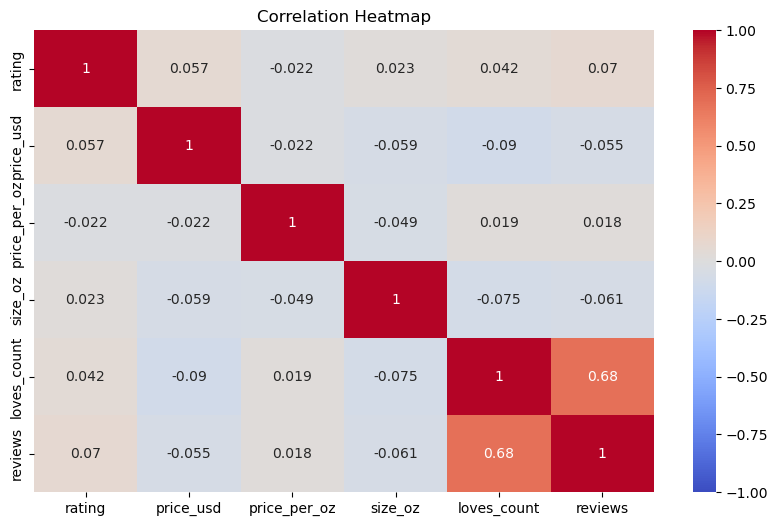

In [78]:
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [79]:
# Relationship between rating and top 10 ingredients
correlation_features = ['rating', 'contains_Glycerin',
       'contains_Phenoxyethanol', 'contains_Caprylyl Glycol',
       'contains_Tocopherol', 'contains_Limonene',
       'contains_Ethylhexylglycerin', 'contains_Dimethicone',
       'contains_Linalool', 'contains_Silica', 'contains_Butylene Glycol']
correlation_data = product_df[correlation_features]

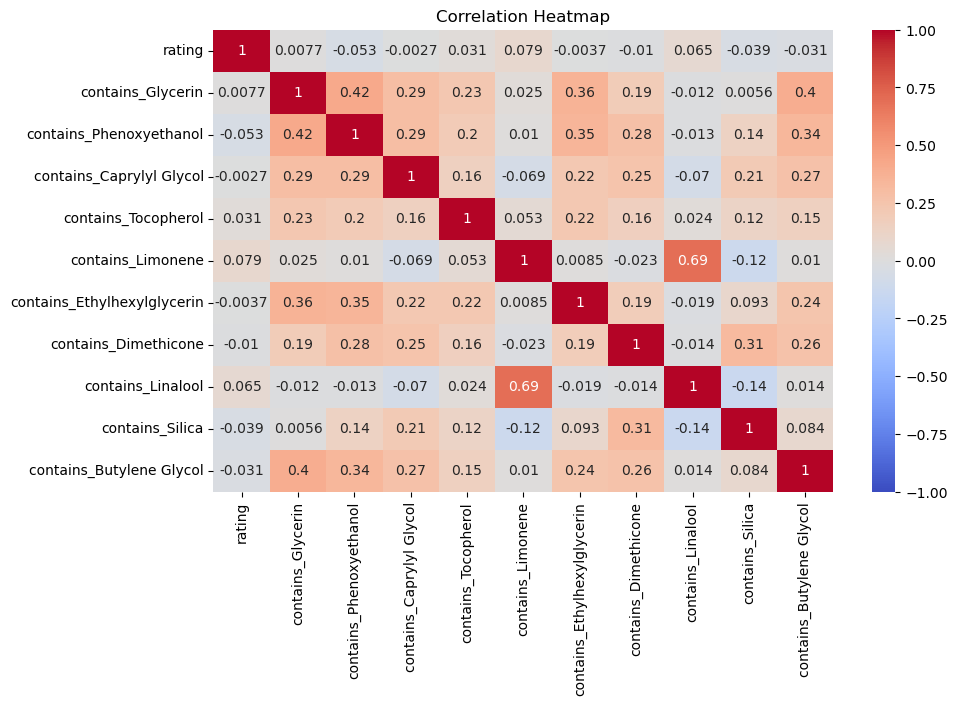

In [80]:
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

From the results above, we can observe that there is **no significant relationship** between loves_count, reviews, ingredients, and rating. 

However, **we will analyze the numerical variables in more detail** in the next several sections, and also **analyze the categorical variables using the Comparative & Multivariate Analysis**.

#### Descriptive Statistics

- **Objective**: Use descriptive statistics to explore the central tendency and dispersion of rating data to identify primary drivers of product ratings.
- **Method**: Calculate the mean, median, mode, range, variance, and standard deviation of product ratings and other factors.
- **Expected Outcome**: By analyzing the mean and median, we can assess rating distribution. Categories with higher standard deviations might indicate a broader range of factors affecting performance.

In [81]:
# Use ChatGPT to generate a summary of the dataset

# Descriptive statistics for the 'rating' column and other relevant columns in product_df
rating_data = product_df['rating']  # Replace 'rating' with actual column name if different

# Calculating descriptive statistics
mean_rating = rating_data.mean()
median_rating = rating_data.median()
mode_rating = rating_data.mode().iloc[0]  # Mode may return multiple values; take the first mode
range_rating = rating_data.max() - rating_data.min()
variance_rating = rating_data.var()
std_dev_rating = rating_data.std()

# Print results
print("Descriptive Statistics for Ratings:")
print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")
print(f"Range: {range_rating}")
print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")

Descriptive Statistics for Ratings:
Mean: 4.194512889483933
Median: 4.289350000000001
Mode: 5.0
Range: 4.0
Variance: 0.26697307784114505
Standard Deviation: 0.5166943756623881


**Conclusions:**

1. **Mean and Median**: 
   - The mean (4.19) and median (4.29) reflect generally positive product ratings, with a skew toward higher values, indicating strong overall customer satisfaction.

2. **Mode**: 
   - A mode of 5.0 suggests that a significant number of products received top ratings.

3. **Range**:
   - Average product ratings span from 1.0 to 5.0, indicating differences in customer satisfaction.

4. **Variance and Standard Deviation**: 
   - The moderate variance (0.27) and standard deviation (0.52) indicate some variation in ratings, showing that while most ratings are clustered, there is notable diversity.

In [82]:
# If you want to calculate these metrics for additional columns (e.g., 'price', 'review_count', etc.), you can loop through them:
relevant_columns = ['price_usd', 'price_per_oz', 'size_oz', 'loves_count', 'reviews']  # Replace with actual column names

# Loop through relevant columns and print statistics
for column in relevant_columns:
    print(f"\nDescriptive Statistics for {column.capitalize()}:")
    mean = product_df[column].mean()
    median = product_df[column].median()
    mode = product_df[column].mode().iloc[0]  # Take the first mode if multiple
    value_range = product_df[column].max() - product_df[column].min()
    variance = product_df[column].var()
    std_dev = product_df[column].std()
    
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Range: {value_range}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")


Descriptive Statistics for Price_usd:
Mean: 51.65559453732046
Median: 35.0
Mode: 30.0
Range: 1897.0
Variance: 2880.386721882422
Standard Deviation: 53.669234407455654

Descriptive Statistics for Price_per_oz:
Mean: 160.71142475513528
Median: 32.35294117647059
Mode: 10.0
Range: 109999.86931818182
Variance: 2595230.6017293455
Standard Deviation: 1610.971943185028

Descriptive Statistics for Size_oz:
Mean: 3.6344106906629747
Median: 1.7
Mode: 1.7
Range: 175.9998
Variance: 45.44301872925057
Standard Deviation: 6.741143725604029

Descriptive Statistics for Loves_count:
Mean: 29179.56592889098
Median: 9880.0
Mode: 0
Range: 1401068
Variance: 4368168668.437603
Standard Deviation: 66092.12258989419

Descriptive Statistics for Reviews:
Mean: 448.54552093476144
Median: 122.0
Mode: 2.0
Range: 21280.0
Variance: 1214365.4939714111
Standard Deviation: 1101.9825288866475


**Conclusions and Why they are considered as related factors:**

1. **Price_usd**: 
   - Positive skew with a mean of $51.66 and a high variance suggests a range of product pricing. It will potentially impact ratings if high-priced items don't meet expectations.

2. **Price_per_oz**: 
   - The high mean of $160.71 with a large standard deviation implies a few very expensive products that may set variable customer expectations and influence ratings.

3. **Size_oz**: 
   - Mean of 3.63 oz and lower variance suggest that most products are small, which could indirectly impact ratings if larger sizes are perceived as better value.

4. **Loves_count**: 
   - High variance and mean of 29,179 suggest popularity varies widely. Higher "Loves" counts may correlate with higher ratings, reflecting customer satisfaction.

5. **Reviews**: 
   - Positive skew with a mean of 448.55 and high variance indicates some products have more customer engagement, which could stabilize average ratings.

#### Inferential Statistics

- **Objective**: Validate which variables (such as price, product type, or ingredients) significantly influence product ratings.
- **Method**:
    - **Regression Analysis**: Evaluate relationships between product features (e.g., price, number of ingredients) and ratings.
    - **ANOVA (Analysis of Variance)**: Test for significant differences in ratings across different product categories.
- **Expected Outcome**: Determine whether certain product features have a significant effect on ratings, explaining why some products underperform.

#### Graphical Analysis

- **Objective**: Visually display rating distributions and correlations to identify potential drivers.
- **Method**: Use bar charts and box plots to observe rating distributions across product categories, and scatter plots to examine ratings against factors like price and ingredients.
- **Expected Outcome**: Identify trends in rating distribution and potential outliers to determine which features are associated with higher or lower ratings.

##### Price v.s. Rating

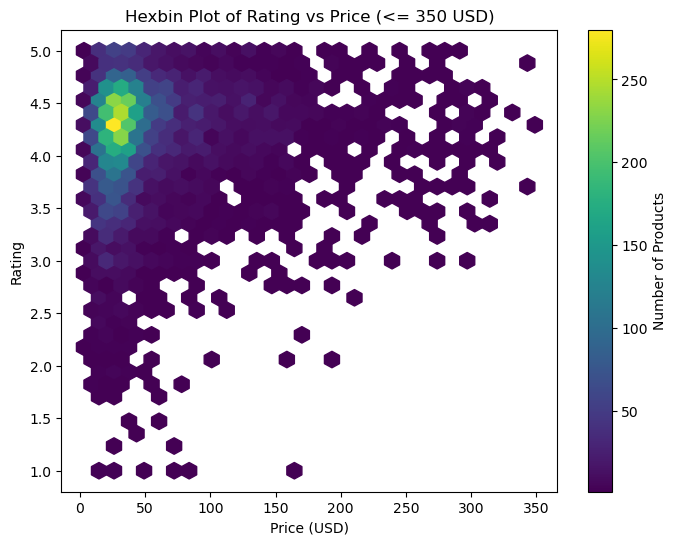

In [83]:
# Hexbin Plot (Rating vs Price)
# Filter products with price <= 350 USD
filtered_df = product_df[product_df['price_usd'] <= 350]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_df['price_usd'], filtered_df['rating'], gridsize=30, 
           cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Rating vs Price (<= 350 USD)')
plt.show()

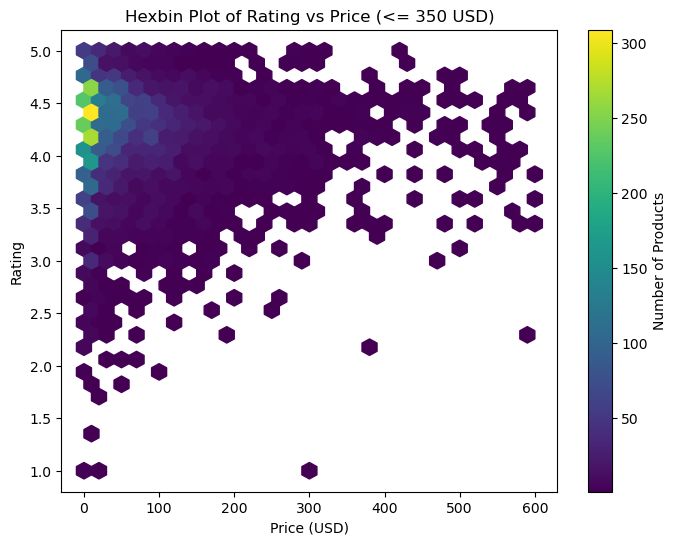

In [84]:
# Hexbin Plot (Rating vs Unit Price)
# Filter products with unit price <= 600 USD
filtered_df = product_df[product_df['price_per_oz'] <= 600]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_df['price_per_oz'], filtered_df['rating'], gridsize=30, 
           cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Rating vs Price (<= 350 USD)')
plt.show()

C:\Users\86151\AppData\Local\Temp\ipykernel_29432\3323118198.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()


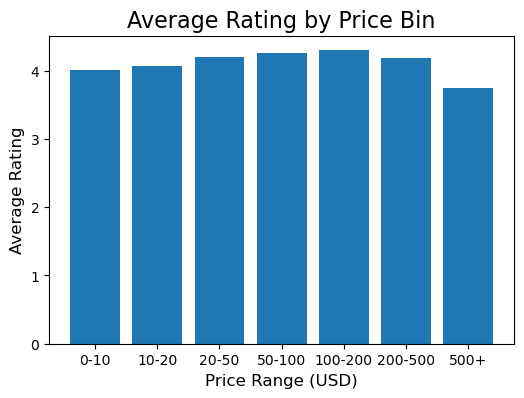

In [85]:
bins = [0, 10, 20, 50, 100, 200, 500, product_df['price_usd'].max()]
labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-500', f'500+']

product_df['price_bin'] = pd.cut(product_df['price_usd'], bins=bins, labels=labels, include_lowest=True)

avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(avg_rating_by_bin['price_bin'], avg_rating_by_bin['rating'])
plt.title('Average Rating by Price Bin', fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.show()

C:\Users\86151\AppData\Local\Temp\ipykernel_29432\716176245.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()


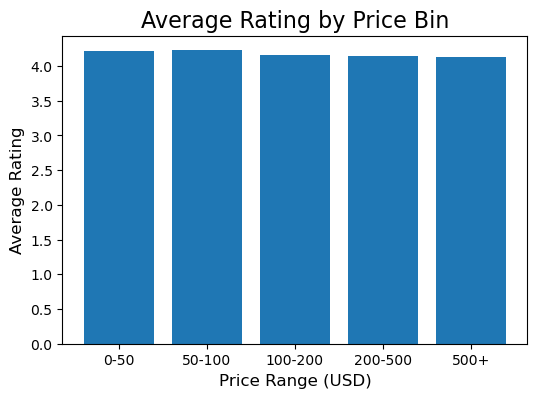

In [86]:
bins = [0, 50, 100, 200, 500, product_df['price_per_oz'].max()]
labels = ['0-50', '50-100', '100-200', '200-500', f'500+']

product_df['price_bin'] = pd.cut(product_df['price_per_oz'], bins=bins, labels=labels, include_lowest=True)

avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(avg_rating_by_bin['price_bin'], avg_rating_by_bin['rating'])
plt.title('Average Rating by Price Bin', fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.show()

**Analysis:**

From the figure above, we can observe **slight differences between total price and average rating**. However, **no noticeable differences** are found between unit price and average rating.  

Additionally, if we aim to **achieve higher ratings**, setting the price within the **20-200** range may be effective.

#### Comparative Analysis

- **Objective**: Compare ratings across different product categories or other subsets to explore variations.
- **Method**: Compare ratings by category to identify the performance of specific groups.
- **Expected Outcome**: Identify categories with notably higher or lower ratings, explaining which factors might drive ratings up or down.

##### Category v.s. Rating

In [87]:
# Primary Category vs Average Rating
product_df['rating'] = pd.to_numeric(product_df['rating'], errors='coerce')

avg_rating_by_category = product_df.groupby('primary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['primary_category', 'average_rating']
print(avg_rating_by_category)

  primary_category  average_rating
2            Gifts        4.563450
5              Men        4.504992
8  Tools & Brushes        4.271458
1        Fragrance        4.230889
7         Skincare        4.228890
3             Hair        4.201113
0      Bath & Body        4.195015
4           Makeup        4.146845
6        Mini Size        4.005665


In [88]:
# Secondary Category vs Average Rating
avg_rating_by_category = product_df.groupby('secondary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['secondary_category', 'average_rating']
print(avg_rating_by_category)

           secondary_category  average_rating
29                Other Needs        4.682980
32                    Shaving        4.641243
25                        Men        4.548450
23            Makeup Palettes        4.513805
18                 Hair Tools        4.496691
4          Beauty Supplements        4.421550
1                 Bath & Body        4.377929
34                   Skincare        4.353302
10                      Cheek        4.323424
3          Beauty Accessories        4.322500
11                  Cleansers        4.314373
37                 Treatments        4.306111
8       Brushes & Applicators        4.305875
27               Moisturizers        4.277424
24                      Masks        4.259330
17  Hair Styling & Treatments        4.244675
7           Body Moisturizers        4.237487
40                      Women        4.233255
31      Shampoo & Conditioner        4.214010
20                        Lip        4.209429
2               Bath & Shower     

In [89]:
# Secondary Category vs Average Rating
avg_rating_by_category = product_df.groupby('tertiary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['tertiary_category', 'average_rating']
print(avg_rating_by_category)

              tertiary_category  average_rating
82                  Lip Brushes        4.711833
108                     Shaving        4.709130
91   Makeup Bags & Travel Cases        4.690660
12                Body Products        4.682980
54                    Face Wash        4.624411
..                          ...             ...
32   Deodorant & Antiperspirant        3.764542
5      Bath Soaks & Bubble Bath        3.705443
30                 Damaged Hair        3.696500
3                 BB & CC Cream        3.669130
93    Manicure & Pedicure Tools        2.285700

[118 rows x 2 columns]


**Analysis:**

From the results, we can observe the following trends:

**Primary Category:**  
- **Top performers:** "Gifts" (4.56) and "Men" (4.50) have the highest average ratings, indicating that these product categories are highly appreciated by customers. This may suggest that these products meet customer expectations well, potentially due to their quality, usability, or alignment with specific customer needs.  
- **Lower performers:** "Mini Size" (4.00) and "Makeup" (4.14) receive comparatively lower ratings, suggesting room for improvement. It’s possible that mini-sized products offer less value or that makeup items may not fully meet customer expectations in terms of variety, durability, or performance.  

**Secondary Category:**  
- **Highest rated:** "Other Needs" (4.68) and "Shaving" (4.64) receive the highest scores, indicating strong customer satisfaction. Shaving products might perform well due to their practical utility, while "Other Needs" likely covers niche items that satisfy specific demands.  
- **Lower ratings:** Categories like "Nail" (3.88) and "Fragrance" (3.87) are rated lower, possibly due to limited product effectiveness, insufficient variety, or unmet customer expectations. The subjective nature of fragrances and varying preferences in nail care products could contribute to these lower ratings.  

**Tertiary Category:**  
- **Top categories:** "Lip Brushes" (4.71) and "Shaving" (4.71) are among the highest-rated, suggesting these niche products perform well. This could imply that customers appreciate specialized tools that enhance their beauty routines or provide value through functionality.  
- **Lowest performers:** "Manicure & Pedicure Tools" (2.29) and "BB & CC Cream" (3.67) have the lowest average ratings, indicating dissatisfaction or unmet expectations. This could result from poor product quality, lack of innovation, or insufficient effectiveness compared to competitors.  

These results highlight areas where certain products excel and others fall short, suggesting that focusing on **customer feedback and product refinement** in the lower-performing categories could enhance overall satisfaction.

##### Brand vs Average Rating

In [90]:
# brand_name vs Average Rating
avg_rating_by_category = product_df.groupby('brand_name')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['brand_name', 'average_rating']
print(avg_rating_by_category)

           brand_name  average_rating
78        Erno Laszlo        5.000000
10              Aquis        4.904800
158   MACRENE actives        4.889420
161              MARA        4.823860
32             CANOPY        4.813733
..                ...             ...
47   Christophe Robin        3.154767
101    Good Dye Young        3.062050
194           Overose        2.848450
253         The Maker             NaN
299        philosophy             NaN

[304 rows x 2 columns]


**Analysis:**

**Top Brands:**
- **Erno Laszlo** (5.00), **Aquis** (4.90), **MACRENE actives** (4.89), and **MARA** (4.82) show high customer satisfaction, likely due to consistent quality and meeting customer needs.

**Lower-Rated Brands:**
- **Christophe Robin** (3.15) and **Good Dye Young** (3.06) have lower ratings, suggesting issues with product quality or unmet expectations.

**Lowest-Rated Brand:**
- **Overose** (2.85) indicates significant dissatisfaction, likely due to performance issues or poor customer experience.

High-performing brands should maintain their quality, while underperforming brands need to address product and customer experience issues.

##### Rating v.s. Online or not

In [91]:
# Online vs Average Rating
avg_rating_by_category = product_df.groupby('online_only')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['online_only', 'average_rating']
print(avg_rating_by_category)

   online_only  average_rating
0            0        4.200374
1            1        4.172408


**Non-online products** (4.20) have slightly higher ratings than **online-only products** (4.17).

#### Multivariate Analysis

- **Objective**: Study the influence of multiple factors on ratings simultaneously.
- **Method**: Use pivot tables and multivariate scatter plots to explore the relationship between ingredient counts, prices, and ratings.
- **Expected Outcome**: Understand how various factors interact to drive ratings higher or lower.

##### Rating v.s. Online or not & Category

In [92]:
# Calculate average rating by both primary category and online_only status
avg_rating_online_category = product_df.groupby(['primary_category', 'online_only'])['rating'].mean().reset_index()

# Pivot the data for better comparison
pivot_table = avg_rating_online_category.pivot(index='primary_category', columns='online_only', values='rating')

pivot_table.columns = ['Non-Online', 'Online']

# Calculate the rating difference between online and non-online categories
pivot_table['Rating_Difference'] = pivot_table['Online'] - pivot_table['Non-Online']

pivot_table = pivot_table.sort_values(by='Rating_Difference', ascending=False)
print(pivot_table)

                  Non-Online    Online  Rating_Difference
primary_category                                         
Mini Size           3.998237  4.058100           0.059863
Skincare            4.218118  4.271438           0.053320
Tools & Brushes     4.271543  4.271013          -0.000530
Hair                4.205973  4.191046          -0.014927
Bath & Body         4.222076  4.151288          -0.070788
Fragrance           4.259239  4.144556          -0.114683
Men                 4.542989  4.382857          -0.160132
Makeup              4.164505  3.998730          -0.165774
Gifts               4.563450       NaN                NaN


**Analysis:**

**Primary Category Comparison:**  
1. **Higher Online Ratings:**  
   - **Mini Size:** 4.06 vs. 3.99 (+0.06) – More convenient for online purchases.  
   - **Skincare:** 4.27 vs. 4.22 (+0.05) – Benefits from detailed product information online.

2. **Minimal Difference:**  
   - **Tools & Brushes:** 4.27 vs. 4.27 (-0.0005) – Similar satisfaction across both channels.

3. **Higher Non-Online Ratings:**  
   - **Makeup:** 4.16 vs. 3.99 (-0.17) – In-person trials likely preferred.  
   - **Fragrance:** 4.26 vs. 4.14 (-0.11) – Harder to evaluate online.  
   - **Men:** 4.54 vs. 4.38 (-0.16) – Benefits from in-store accessibility and recommendations.

**Conclusion:**
- **Products like Mini Size and Skincare** benefit from online availability, likely due to convenience and access to reviews.
- **Makeup and Fragrances** perform better offline, suggesting that in-store experiences play a key role in customer satisfaction for these categories.
- **Distribution Strategy Implication:** Focusing on enhancing **online shopping experiences for Makeup and Fragrances** (e.g., offering virtual try-ons) could help improve ratings.

#### Synthesis

**Conclusion:**


### Research Question 2: **How does customer sentiment change over time?**

1. **Descriptive Statistics**:
    - **Objective**: Explore trends in time series data through descriptive statistics to gain an initial understanding of customer sentiment fluctuations.
    - **Method**: Calculate the mean and standard deviation of sentiment ratings for each time period to determine the trend and range of sentiment changes.
    - **Expected Outcome**: Identify central tendencies and volatility in sentiment, providing an initial understanding of sentiment trends over time.

2. **Inferential Statistics**:
    - **Objective**: Test the significance of time-related changes in customer sentiment.
    - **Method**: Use **time series analysis** or **linear regression** to assess the influence of time on sentiment ratings.
    - **Expected Outcome**: Determine if sentiment changes significantly over time, offering potential explanations for sentiment shifts.

3. **Graphical Analysis**:
    - **Objective**: Use visualizations to identify sentiment change patterns within the time series.
    - **Method**: Use line charts and bar charts to display sentiment score changes over different periods, making trends easier to observe.
    - **Expected Outcome**: Visually capture how sentiment changes over time, identifying possible fluctuations or significant trends.

4. **Comparative Analysis**:
    - **Objective**: Compare sentiment ratings across different time periods to observe if there are notable differences.
    - **Method**: Group data by time segments and compare changes in sentiment ratings to identify any seasonal or periodic trends.
    - **Expected Outcome**: Discover significant sentiment changes during specific periods, offering insights into trends in customer sentiment.

5. **Multivariate Analysis**:
    - **Objective**: Investigate the combined effect of time and other variables (e.g., ingredients, ratings) on sentiment.
    - **Method**: Use cross-tabulations and multivariate charts to analyze sentiment score variations across different ingredients over time.
    - **Expected Outcome**: Identify complex relationships between sentiment scores, time, and other variables, determining if sentiment changes are influenced by additional factors.

---

### Research Question 3: **Are certain ingredients linked to positive or negative customer experiences?**

1. **Descriptive Statistics**:
    - **Objective**: Use descriptive statistics to explore associations between ingredients and customer experience scores.
    - **Method**: Calculate the mean, variance, and standard deviation of sentiment ratings for products containing specific ingredients to gauge their effects.
    - **Expected Outcome**: Observe if specific ingredients are associated with higher or lower sentiment scores, offering a preliminary indication of their impact on customer experience.

2. **Inferential Statistics**:
    - **Objective**: Test the significant relationship between specific ingredients and customer experience.
    - **Method**: Use **chi-squared tests** to assess the relationship between ingredients and sentiment scores, or apply **t-tests** and **ANOVA** to compare ratings between products with and without certain ingredients.
    - **Expected Outcome**: Confirm whether certain ingredients are significantly associated with differences in customer experience, supporting or refuting their influence on sentiment.

3. **Graphical Analysis**:
    - **Objective**: Visually display the relationship between ingredients and customer experience.
    - **Method**: Use bar charts and box plots to display sentiment score distributions for products with specific ingredients, helping to identify patterns.
    - **Expected Outcome**: View the distribution of ratings for products with various ingredients, revealing ingredients potentially linked to positive or negative experiences.

4. **Comparative Analysis**:
    - **Objective**: Compare sentiment scores among different ingredient combinations to explore ingredient-related differences.
    - **Method**: Compare sentiment ratings for products with different ingredient combinations to identify significant differences.
    - **Expected Outcome**: Identify ingredient combinations associated with notably positive or negative experiences, providing insights into ingredient impact on customer sentiment.

5. **Multivariate Analysis**:
    - **Objective**: Understand the combined relationships between ingredients, ratings, and sentiment.
    - **Method**: Use multivariate scatter plots and cross-tabulations to analyze relationships between ingredients, ratings, and sentiment scores.
    - **Expected Outcome**: Determine how multiple ingredients collectively influence customer experience, identifying potential interaction effects. 


### Synthesis

### Reflection